In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [100]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,30980,None,None,88372.706872
2020-06-13,30981,None,None,81637.126038
2020-06-14,30982,None,None,75413.467075
2020-06-15,30983,None,None,69722.490174
2020-06-16,30984,None,None,64734.639110
...,...,...,...,...
2021-02-10,31223,None,None,292336.823277
2021-02-11,31224,None,None,279926.911429
2021-02-12,31225,None,None,268741.235629


In [101]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-02-14_2021-02-14-16-36.pickle


In [102]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-02-12_2021-02-12-17-23.pickle


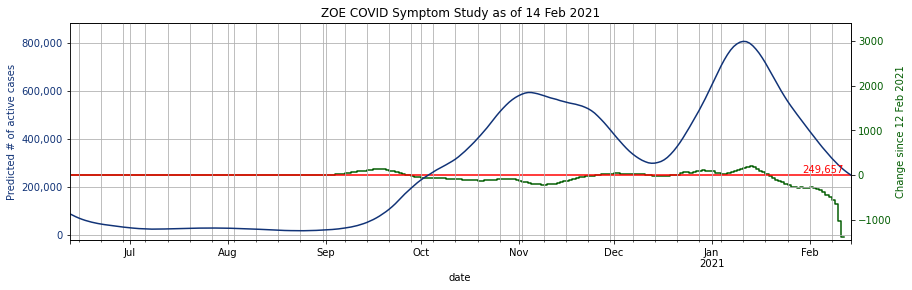

In [103]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

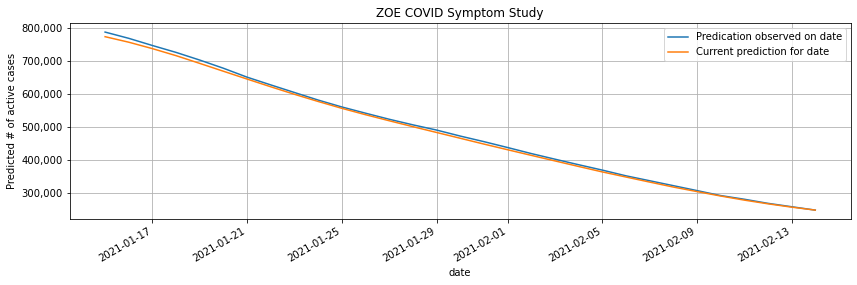

In [104]:
plot_study_evolution(curr_date, days=30)

In [105]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [106]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-02-14_2021-02-14-16-36.pickle


In [107]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
299,Wolverhampton,E08000031,1.619032
379,Tower Hamlets,E09000030,1.443098
100,Erewash,E07000036,1.209843
343,Vale of Glamorgan,W06000014,1.092168
10,Blackpool,E06000009,1.090398
313,Aberdeen City,S12000033,1.085496
209,Mansfield,E07000174,1.057100
346,Hackney,E09000012,0.999020
166,Great Yarmouth,E07000145,0.965045
78,Rushmoor,E07000092,0.962091
